<a href="https://colab.research.google.com/github/Blacknahil/nlp/blob/main/Lab_5_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Word Embeddings - Assignment (Portuguese)

## Exercise

1. Train an word emedding in your language choice (Except English).
2. Observe the top predicted words and similarity scores.
3. Test the word embedding with analogy tests.
4. PCA plots for example words
5. Try different training metods


In this lab, you will learn how words can be represented as numerical vectors (word embeddings) and how these representations capture semantic meaning. You will train Word2Vec models for Portuguese, explore similarities and analogies, and visualize embeddings.

## Environment Setup

In [ ]:
!pip install gensim nltk matplotlib scikit-learn

## Import Required Libraries

In [ ]:
import nltk
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

## Portuguese Word Embeddings

### Load a Portuguese Corpus

In [ ]:
# We use the floresta corpus, a Portuguese corpus in NLTK.
nltk.download('floresta')
from nltk.corpus import floresta
sentences_pt = floresta.sents()
sentences_pt = [[word.lower() for word in sent] for sent in sentences_pt]
print('Number of sentences:', len(sentences_pt))

[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Package floresta is already up-to-date!


Number of sentences: 9266


### Train Word2Vec Model (Portuguese)

In [ ]:
model_pt = Word2Vec(
sentences=sentences_pt,
vector_size=100,
window=5,
min_count=5,
workers=4,
sg=1 # Skip-gram
)

### Explore Vocabulary

In [ ]:
list(model_pt.wv.index_to_key[100:115])

['duas',
 'dias',
 'têm',
 'primeira',
 '!',
 'grande',
 'sido',
 'parte',
 'novo',
 'sempre',
 'eles',
 'bem',
 'tempo',
 'portugal',
 'são_paulo']

### Semantic Similarity

In [ ]:
print('Similarity (rei, mulher):', model_pt.wv.similarity('rei', 'mulher'))

Similarity (rei, mulher): 0.9484601


### Most Similar Words

In [ ]:
model_pt.wv.most_similar('dias', topn=5)

[('quatro', 0.9670394659042358),
 ('cinco', 0.9668185114860535),
 ('dez', 0.9651243686676025),
 ('meses', 0.9607871770858765),
 ('20', 0.960329532623291)]

### Word Analogies

In [ ]:
# Which word is to rei what mulher is to homem?

model_pt.wv.most_similar(
positive=['rei', 'mulher'],
negative=['homem'],
topn=3
)

[('pele', 0.9906777739524841),
 ('cartões', 0.9905907511711121),
 ('ambiental', 0.9903315901756287)]

In [ ]:
model_pt.wv.most_similar(
    positive=['paris', 'itália'],
    negative=['frança'],
    topn=3
)

[('norte-americana', 0.9928454756736755),
 ('municipais', 0.992361843585968),
 ('luz', 0.991538941860199)]

### Visualizing Portuguese Embeddings

In [ ]:
words_to_visualize = ['rei', 'dias', 'homem', 'mulher', 'tecnologia', 'semanas', 'meses', 'brasil', 'portugal', 'lisboa', 'madrid', 'palavra', 'linguagem']

# Filter out words not in the model's vocabulary
words_pt = [word for word in words_to_visualize if word in model_pt.wv.index_to_key]
vectors_pt = [model_pt.wv[word] for word in words_pt]

print(f"Words found in vocabulary: {words_pt}")

Words found in vocabulary: ['rei', 'dias', 'homem', 'mulher', 'tecnologia', 'semanas', 'meses', 'brasil', 'portugal', 'lisboa', 'madrid', 'palavra', 'linguagem']


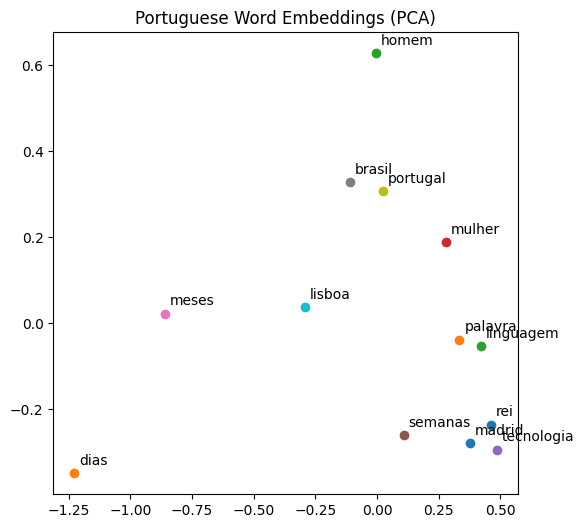

In [ ]:
pca = PCA(n_components=2)
reduced_pt = pca.fit_transform(vectors_pt)
plt.figure(figsize=(6,6))
for i, word in enumerate(words_pt):
  plt.scatter(reduced_pt[i,0], reduced_pt[i,1])
  plt.text(reduced_pt[i,0]+0.02, reduced_pt[i,1]+0.02, word)

plt.title('Portuguese Word Embeddings (PCA)')
plt.show()

### Try Different Training Methods

So far we've used Skip-gram (sg=1). Let's also try CBOW (Continuous Bag of Words) with sg=0.


In [ ]:
# Train a CBOW model (sg=0) for comparison
model_pt_cbow = Word2Vec(
    sentences=sentences_pt,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    sg=0  # CBOW (Continuous Bag of Words)
)


### Compare Skip-gram vs CBOW


In [ ]:
# Compare similarities between Skip-gram and CBOW
if 'rei' in model_pt.wv and 'mulher' in model_pt.wv:
    print("Skip-gram similarity (rei, mulher):", model_pt.wv.similarity('rei', 'mulher'))
    print("CBOW similarity (rei, mulher):", model_pt_cbow.wv.similarity('rei', 'mulher'))
else:
    print("Words not found in vocabulary. Check available words with:")
    print("list(model_pt.wv.index_to_key[:20])")

Skip-gram similarity (rei, mulher): 0.9484601
CBOW similarity (rei, mulher): 0.8943858


### PCA Visualization for CBOW Model


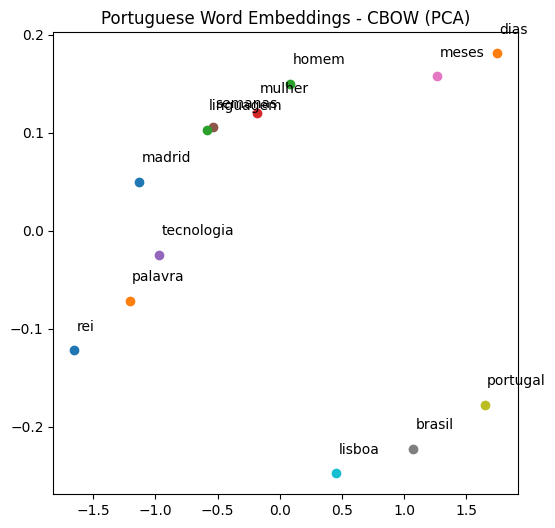

In [ ]:
# PCA visualization for CBOW model
words_to_visualize_cbow = ['rei', 'dias', 'homem', 'mulher', 'tecnologia', 'semanas', 'meses', 'brasil', 'portugal', 'lisboa', 'madrid', 'palavra', 'linguagem']
words_pt_cbow = [word for word in words_to_visualize_cbow if word in model_pt_cbow.wv.index_to_key]
vectors_pt_cbow = [model_pt_cbow.wv[word] for word in words_pt_cbow]

pca_cbow = PCA(n_components=2)
reduced_pt_cbow = pca_cbow.fit_transform(vectors_pt_cbow)
plt.figure(figsize=(6,6))
for i, word in enumerate(words_pt_cbow):
  plt.scatter(reduced_pt_cbow[i,0], reduced_pt_cbow[i,1])
  plt.text(reduced_pt_cbow[i,0]+0.02, reduced_pt_cbow[i,1]+0.02, word)

plt.title('Portuguese Word Embeddings - CBOW (PCA)')
plt.show()


In [ ]:
# Compare most similar words
print("Skip-gram - Most similar to 'mulher':")
print(model_pt.wv.most_similar('mulher', topn=5))
print("\nCBOW - Most similar to 'mulher':")
print(model_pt_cbow.wv.most_similar('mulher', topn=5))

Skip-gram - Most similar to 'mulher':
[('estreia', 0.9937801361083984), ('começa', 0.9930740594863892), ('regime', 0.9923320412635803), ('afirmar', 0.9921170473098755), ('campo', 0.9917123317718506)]

CBOW - Most similar to 'mulher':
[('feito', 0.9986392855644226), ('quanto_a', 0.9985555410385132), ('nível', 0.9984725713729858), ('dar', 0.9983789920806885), ('espaço', 0.9983665943145752)]
